# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Heisenbergsche Unschärferelation

hop_size:	32	0.0064
window_size:	32	0.0064


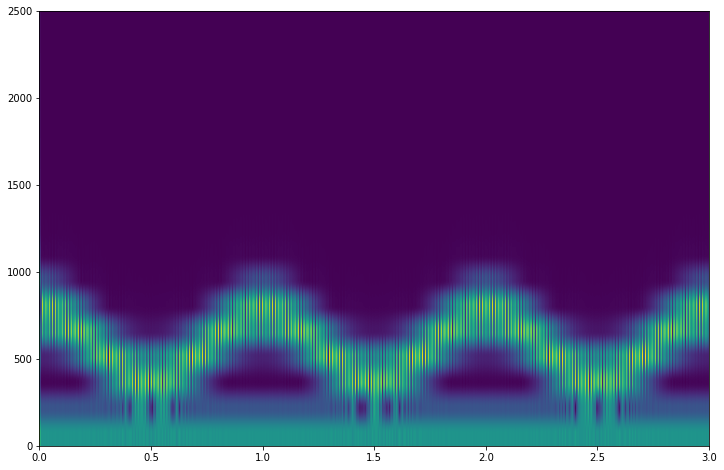

hop_size:	16	0.0032
window_size:	32	0.0064


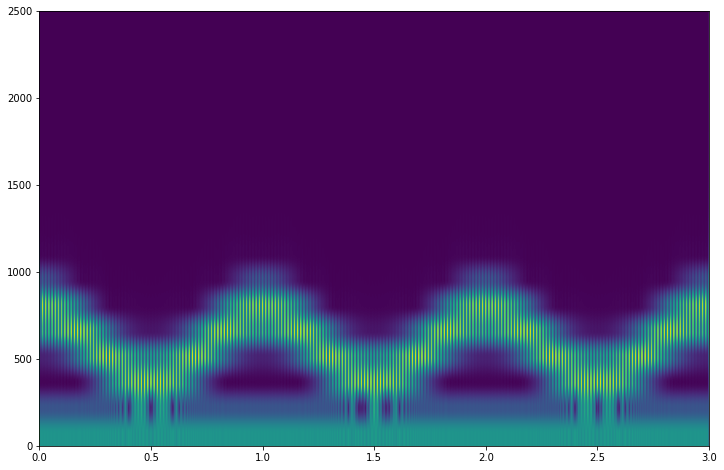

hop_size:	8	0.0016
window_size:	32	0.0064


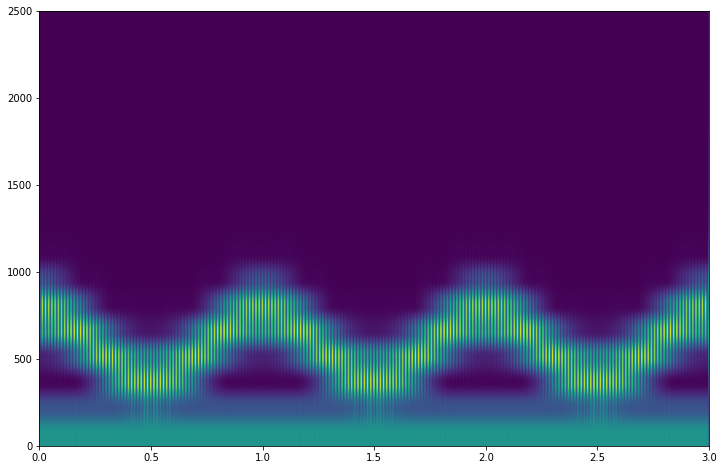

hop_size:	64	0.0128
window_size:	64	0.0128


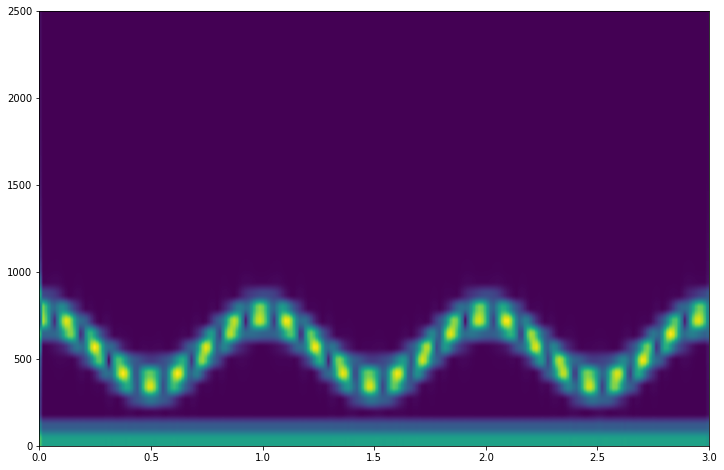

hop_size:	32	0.0064
window_size:	64	0.0128


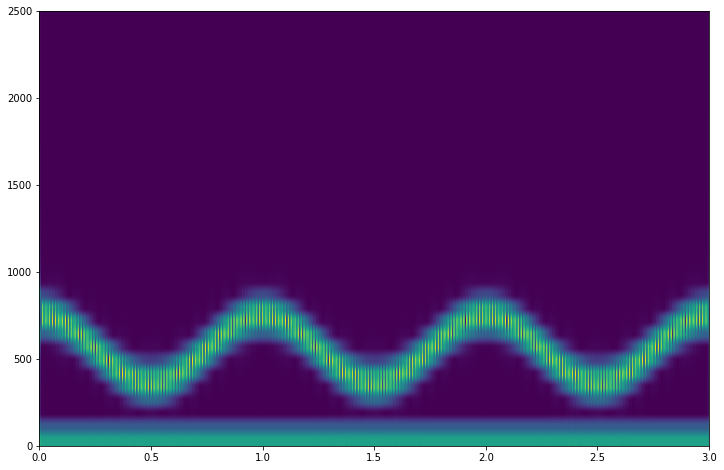

hop_size:	16	0.0032
window_size:	64	0.0128


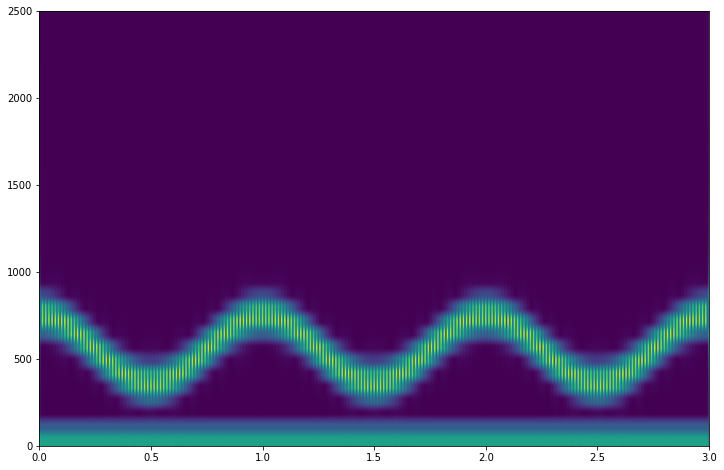

hop_size:	128	0.0256
window_size:	128	0.0256


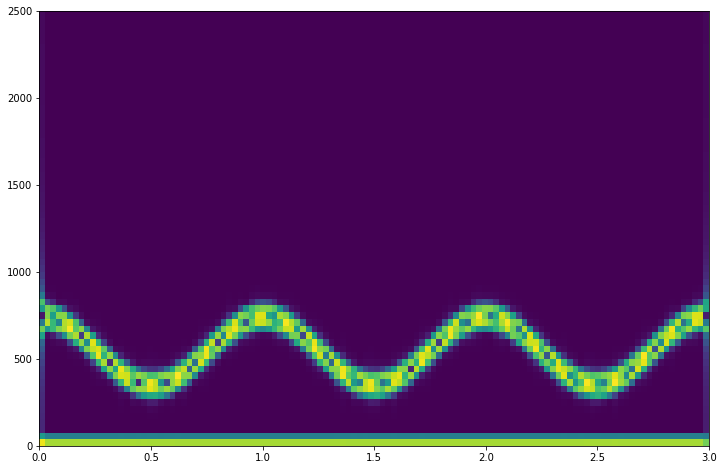

hop_size:	64	0.0128
window_size:	128	0.0256


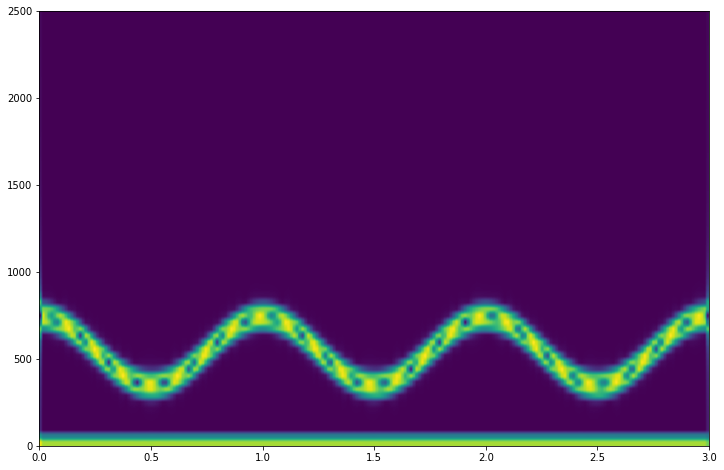

hop_size:	32	0.0064
window_size:	128	0.0256


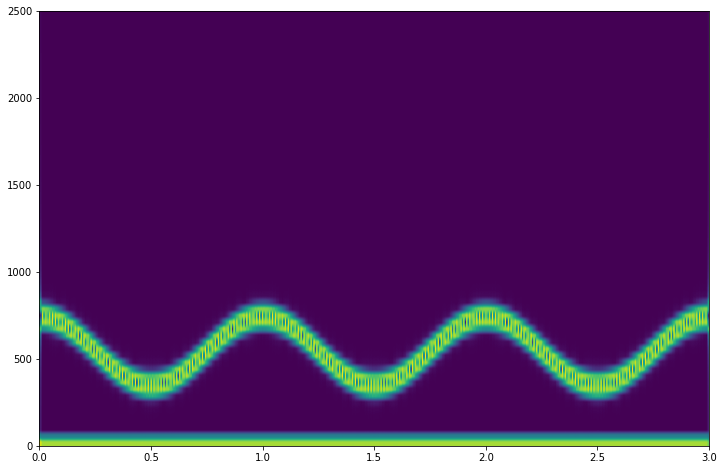

hop_size:	256	0.0512
window_size:	256	0.0512


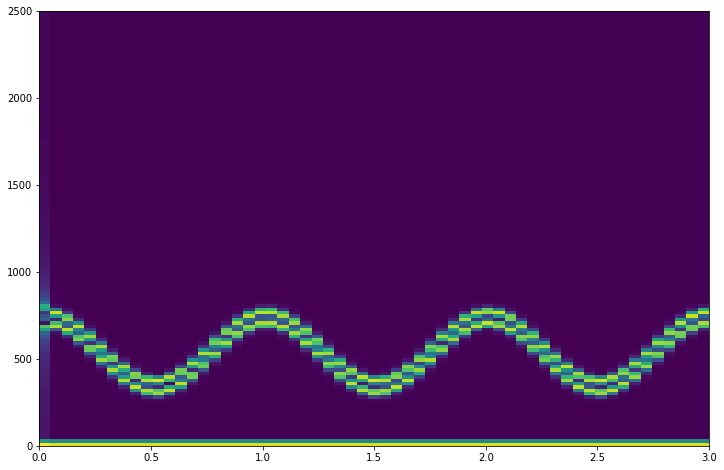

hop_size:	128	0.0256
window_size:	256	0.0512


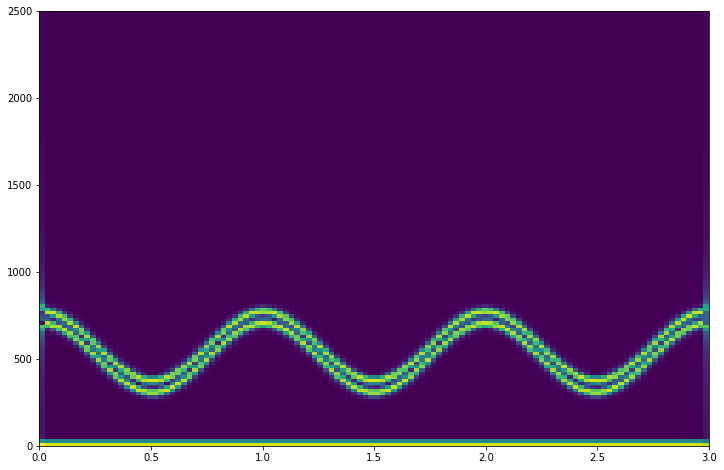

hop_size:	64	0.0128
window_size:	256	0.0512


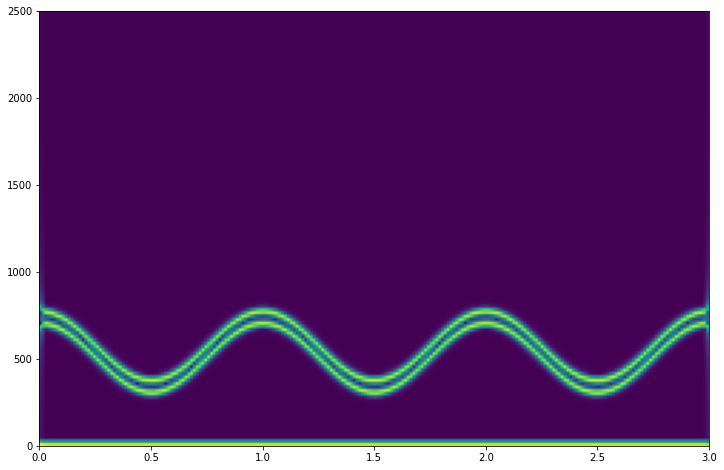

hop_size:	512	0.1024
window_size:	512	0.1024


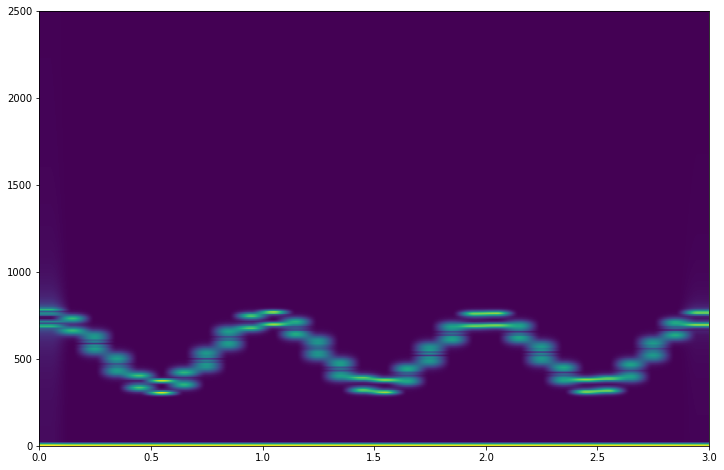

hop_size:	256	0.0512
window_size:	512	0.1024


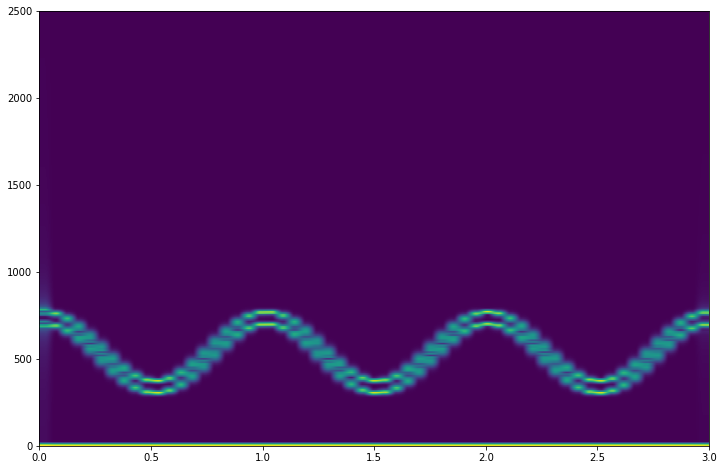

hop_size:	128	0.0256
window_size:	512	0.1024


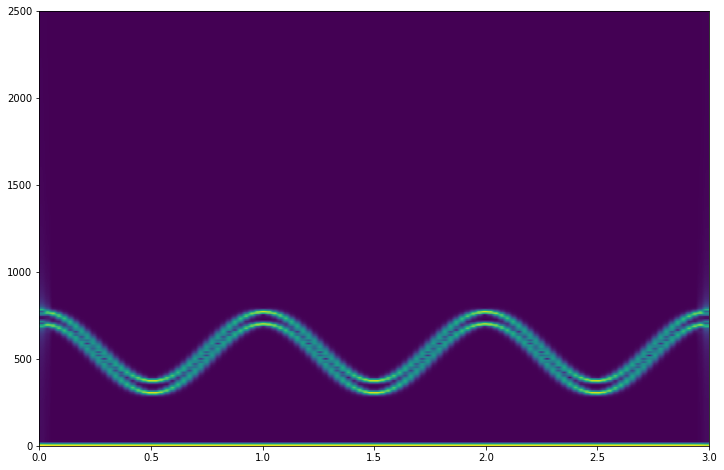

hop_size:	1024	0.2048
window_size:	1024	0.2048


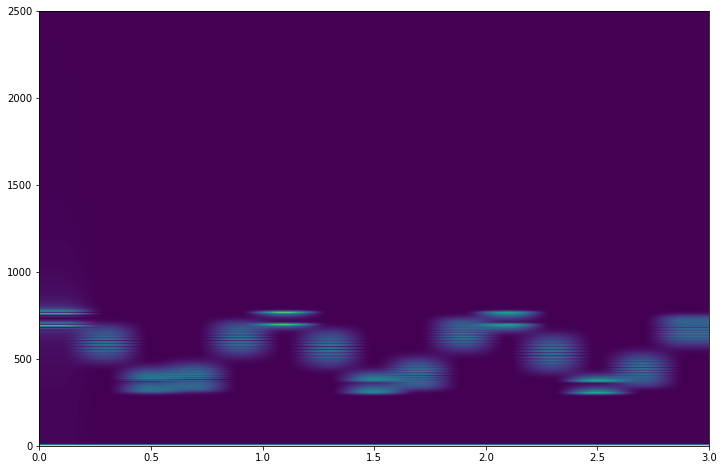

hop_size:	512	0.1024
window_size:	1024	0.2048


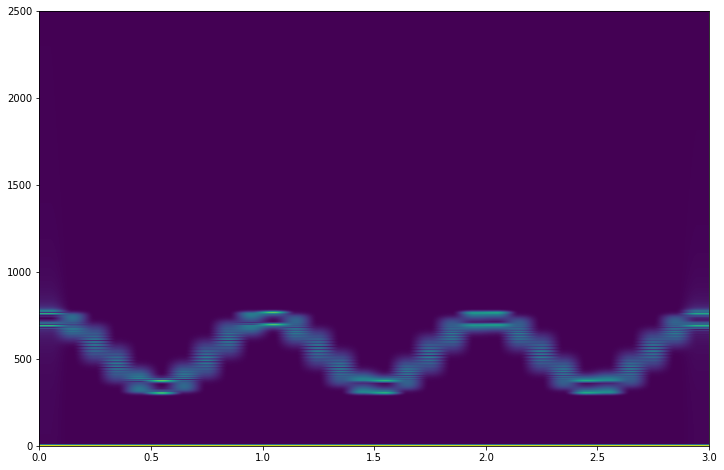

hop_size:	256	0.0512
window_size:	1024	0.2048


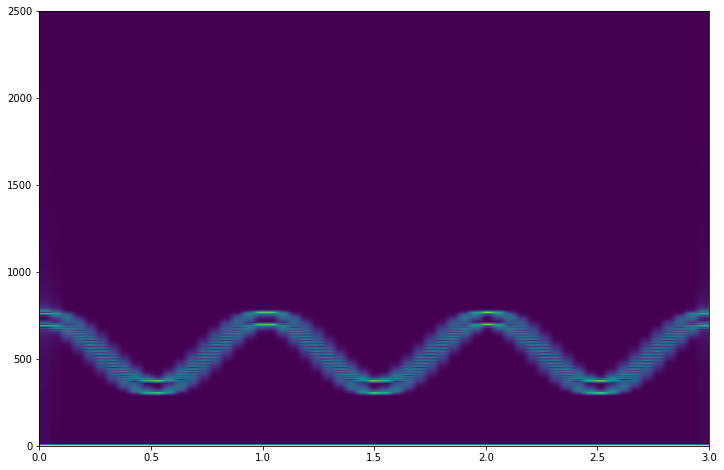

hop_size:	2048	0.4096
window_size:	2048	0.4096


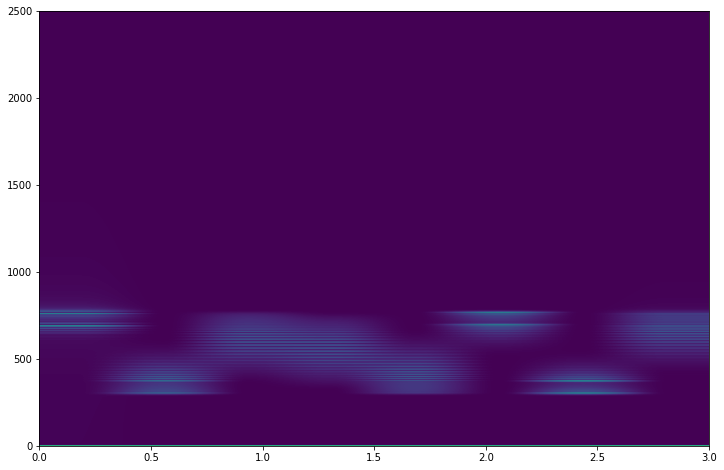

hop_size:	1024	0.2048
window_size:	2048	0.4096


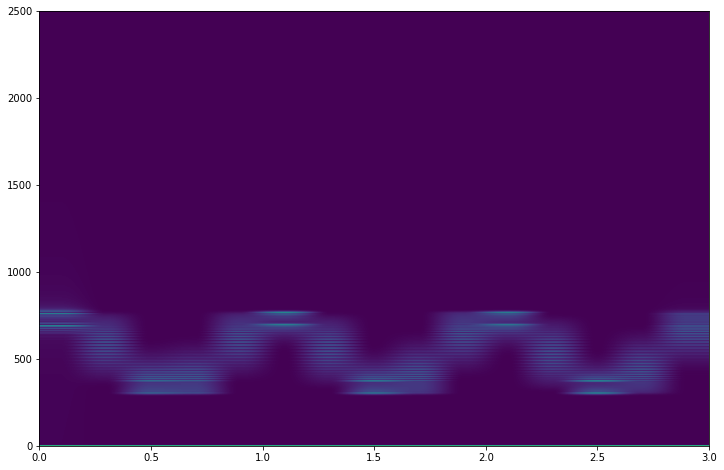

hop_size:	512	0.1024
window_size:	2048	0.4096


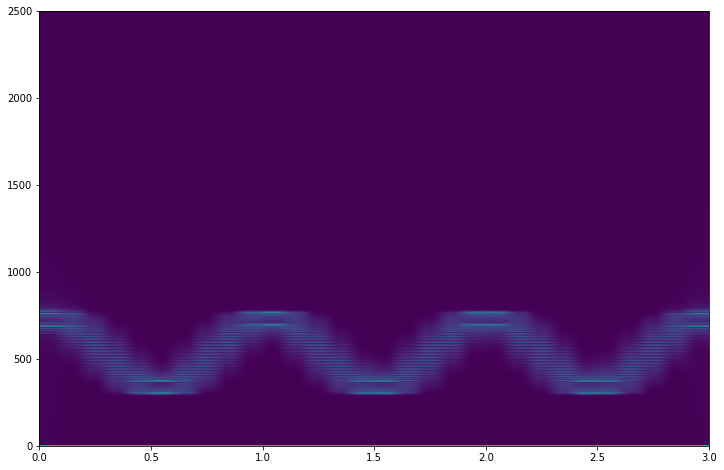

hop_size:	4096	0.8192
window_size:	4096	0.8192


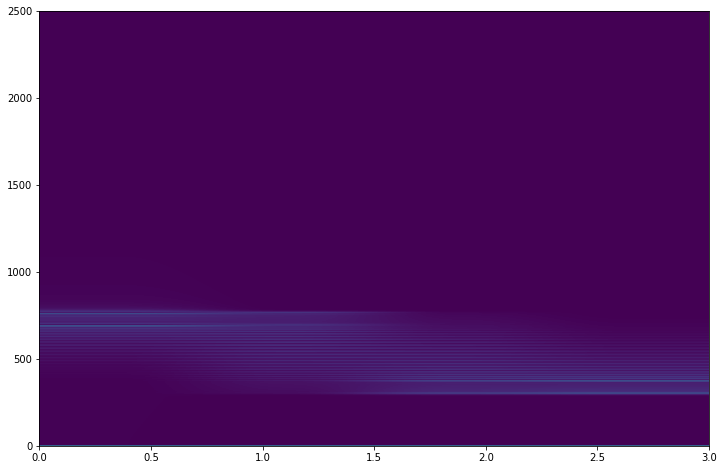

hop_size:	2048	0.4096
window_size:	4096	0.8192


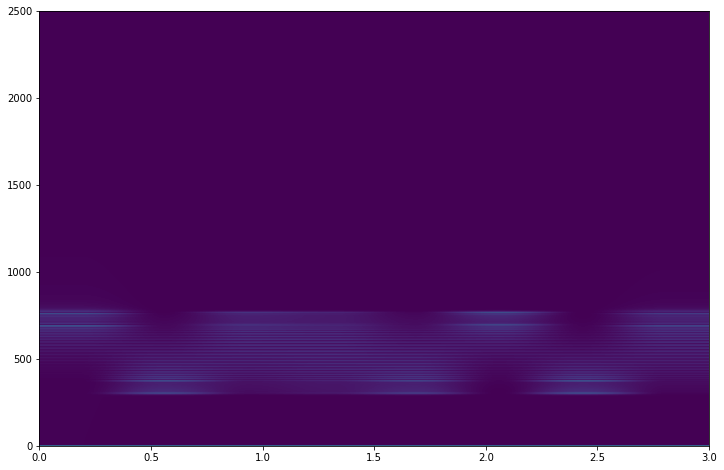

hop_size:	1024	0.2048
window_size:	4096	0.8192


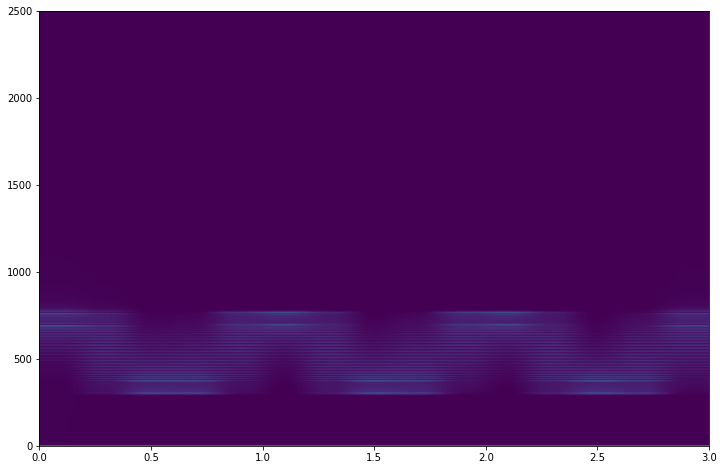

In [2]:
# können wir die frequenz-auf/ab-bewegung im spektrogramm gut darstellen und die beiden frequenzen getrennt sehen?
sr = 5000
length = 3
t = np.linspace(0, length, length * sr)
mod = np.sin(t * 2 * np.pi * 1) * 200
x = (np.sin(t * 2 * np.pi * 500 + mod) + np.sin(t * 2 * np.pi * 570 + mod)) + 0.5

display(Audio(x, rate=sr))

window_sizes = 2 ** np.arange(5, 13)
for window_size in window_sizes:
    hop_sizes = window_size // [1, 2, 4]
    for hop_size in hop_sizes:
        stft = lr.stft(x, n_fft=window_size, hop_length=hop_size)
        print('hop_size:\t%d\t%0.4f' % (hop_size, hop_size / sr))
        print('window_size:\t%d\t%0.4f' % (window_size, window_size / sr))
        plt.figure(figsize=(12, 8))
        plt.imshow(np.abs(stft), aspect='auto', origin='lower', extent=[0, length, 0, sr / 2])
        plt.show()

hop_size:	32	0.0040
window_size:	32	0.0040


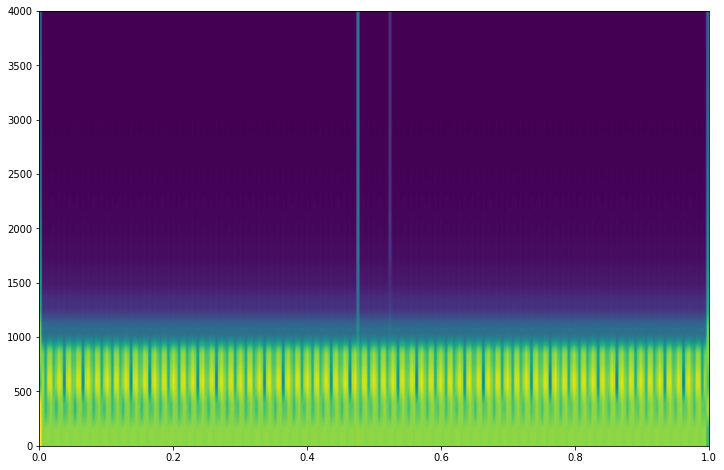

hop_size:	16	0.0020
window_size:	32	0.0040


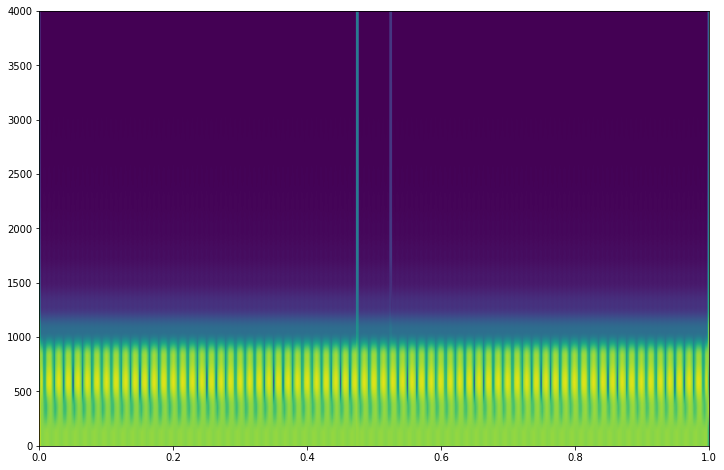

hop_size:	8	0.0010
window_size:	32	0.0040


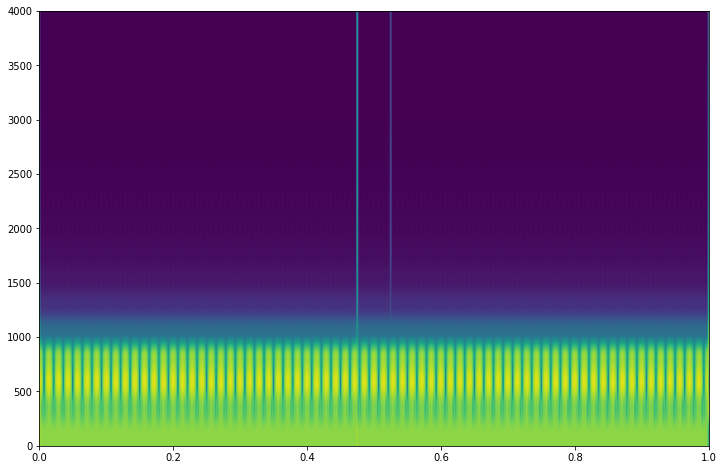

hop_size:	64	0.0080
window_size:	64	0.0080


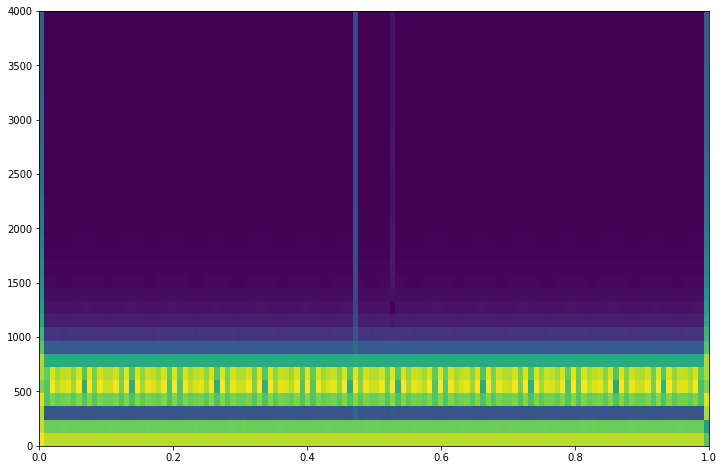

hop_size:	32	0.0040
window_size:	64	0.0080


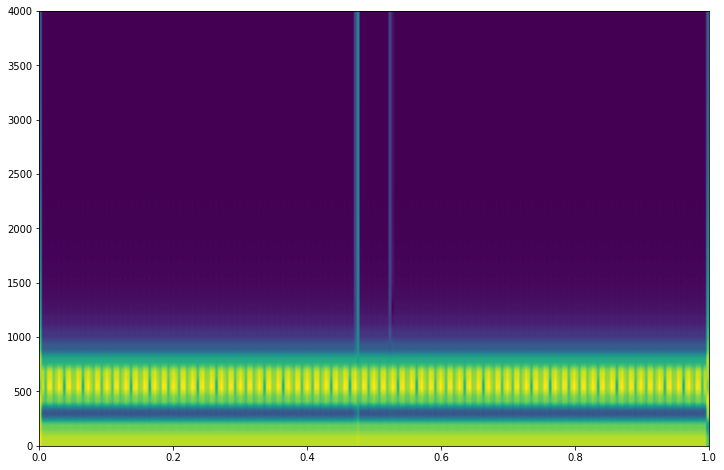

hop_size:	16	0.0020
window_size:	64	0.0080


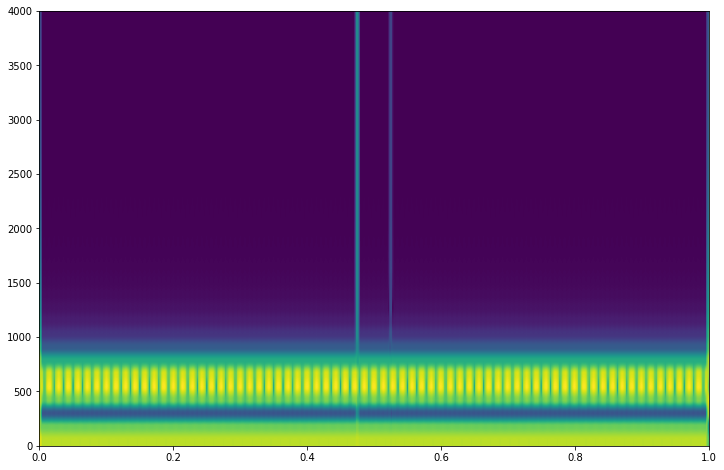

hop_size:	128	0.0160
window_size:	128	0.0160


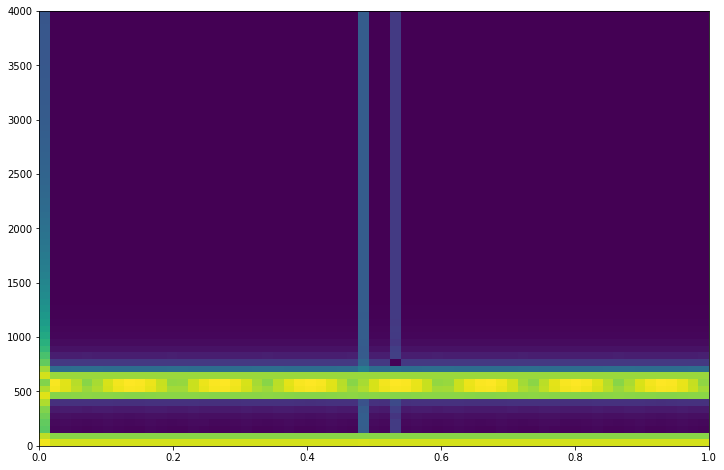

hop_size:	64	0.0080
window_size:	128	0.0160


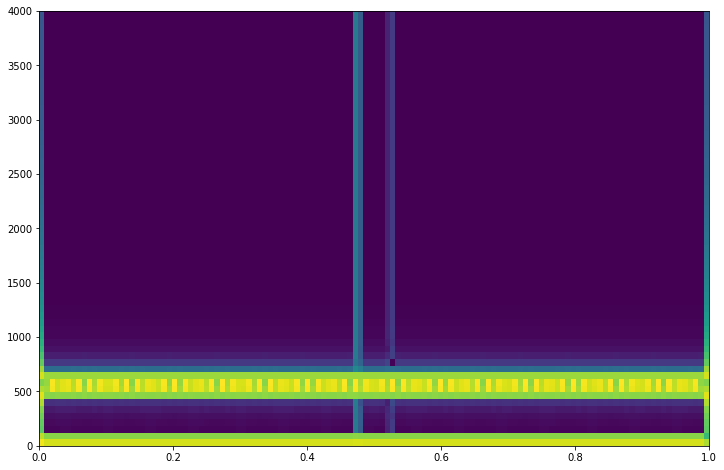

hop_size:	32	0.0040
window_size:	128	0.0160


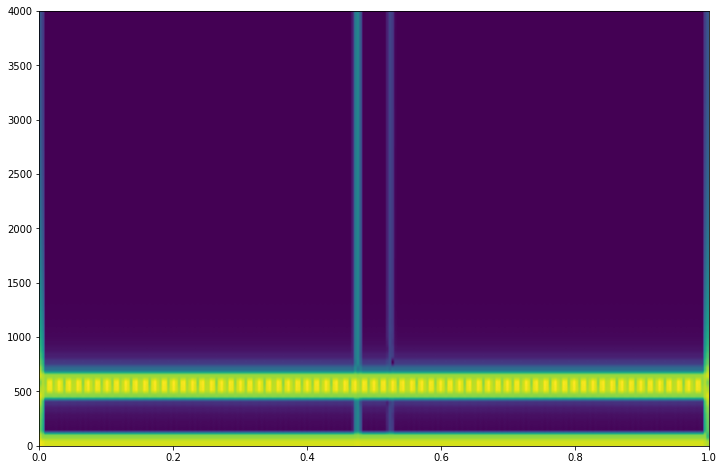

hop_size:	256	0.0320
window_size:	256	0.0320


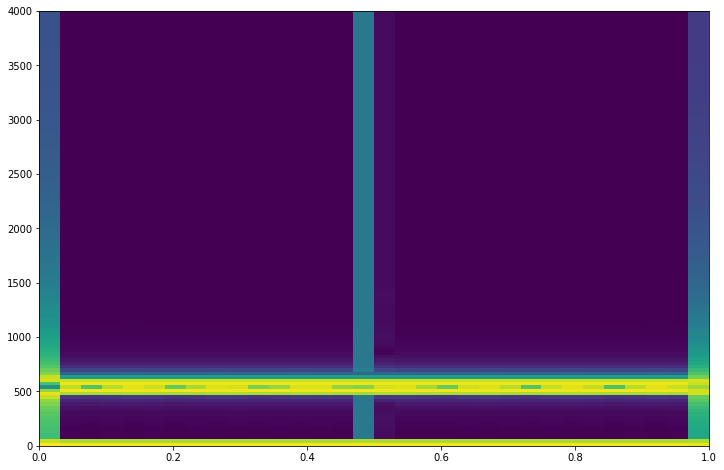

hop_size:	128	0.0160
window_size:	256	0.0320


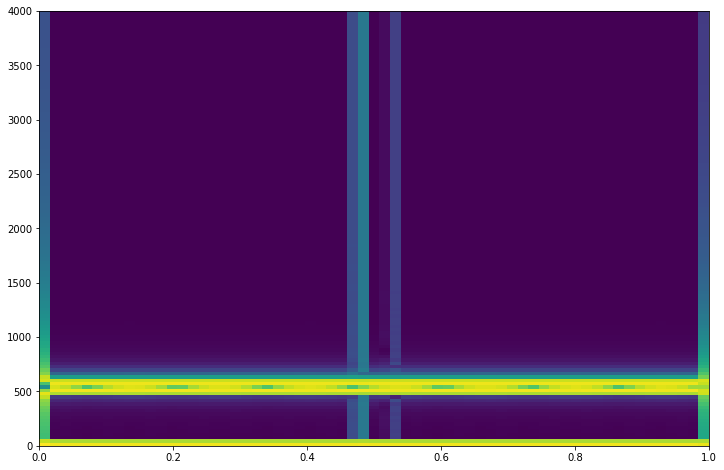

hop_size:	64	0.0080
window_size:	256	0.0320


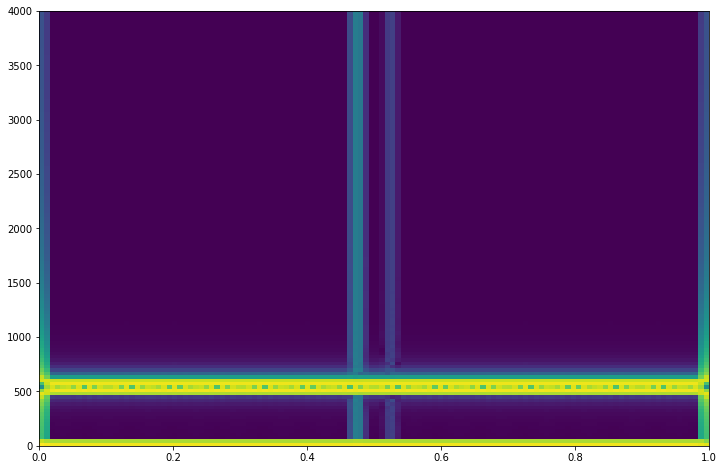

hop_size:	512	0.0640
window_size:	512	0.0640


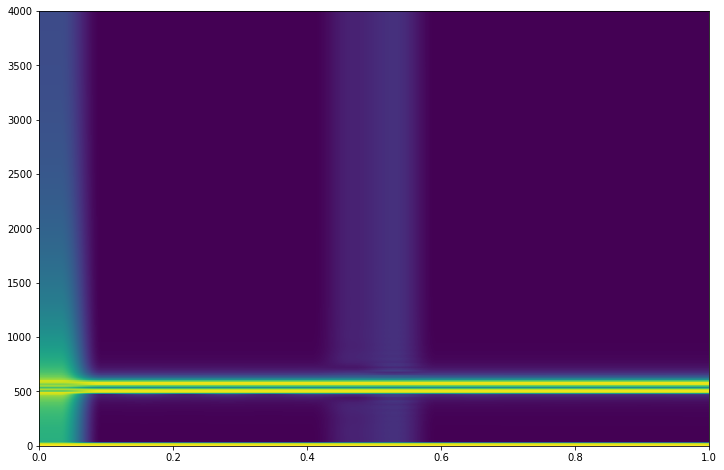

hop_size:	256	0.0320
window_size:	512	0.0640


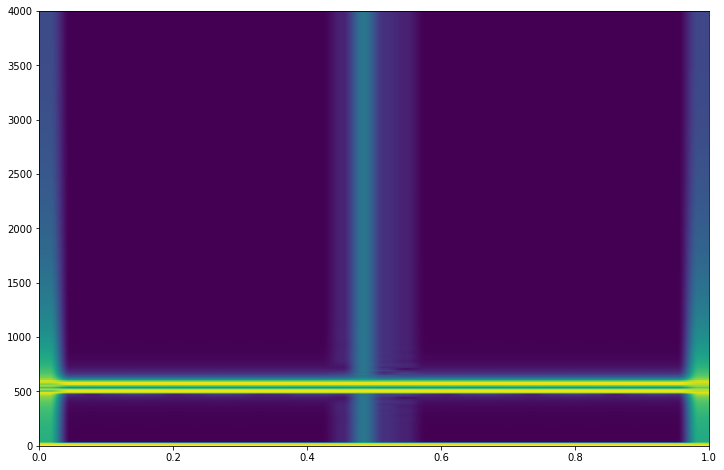

hop_size:	128	0.0160
window_size:	512	0.0640


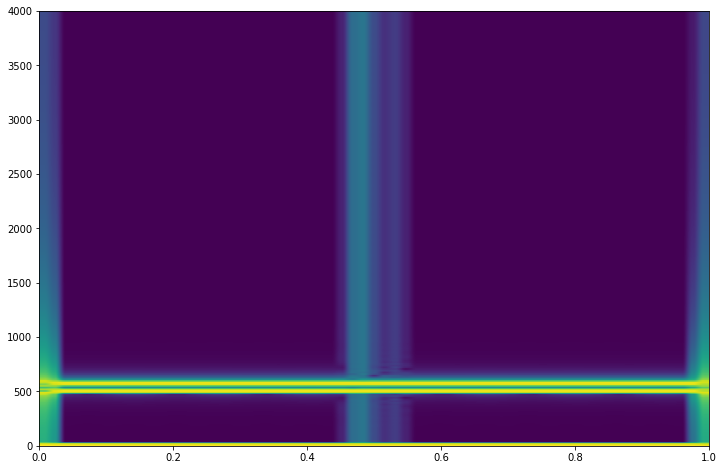

hop_size:	1024	0.1280
window_size:	1024	0.1280


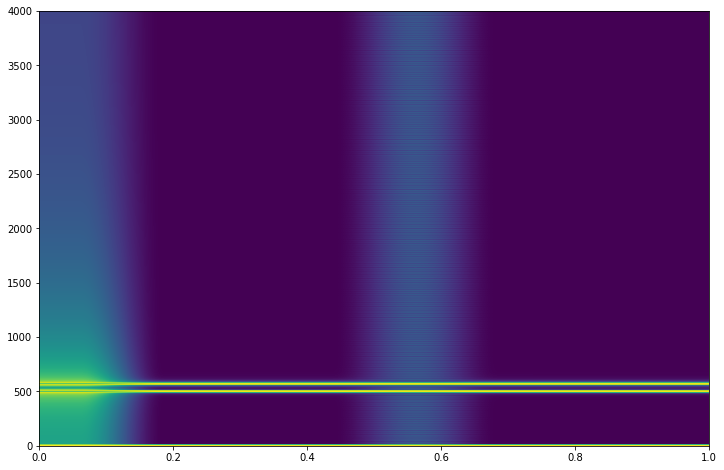

hop_size:	512	0.0640
window_size:	1024	0.1280


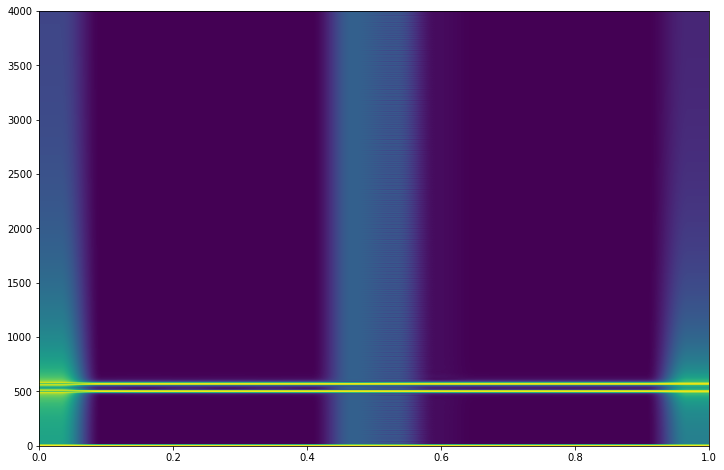

hop_size:	256	0.0320
window_size:	1024	0.1280


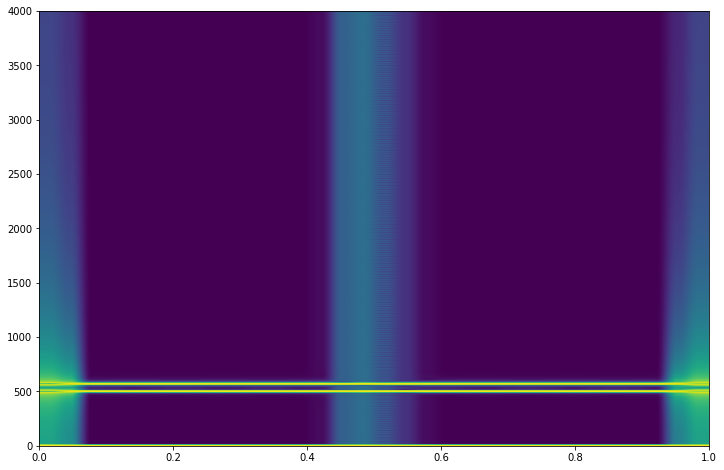

hop_size:	2048	0.2560
window_size:	2048	0.2560


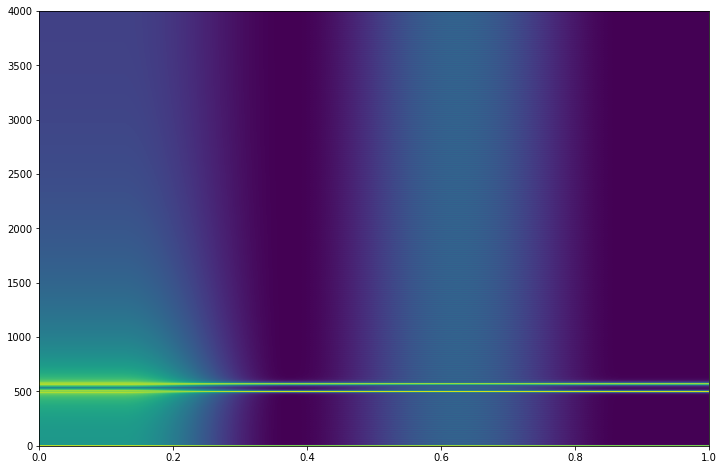

hop_size:	1024	0.1280
window_size:	2048	0.2560


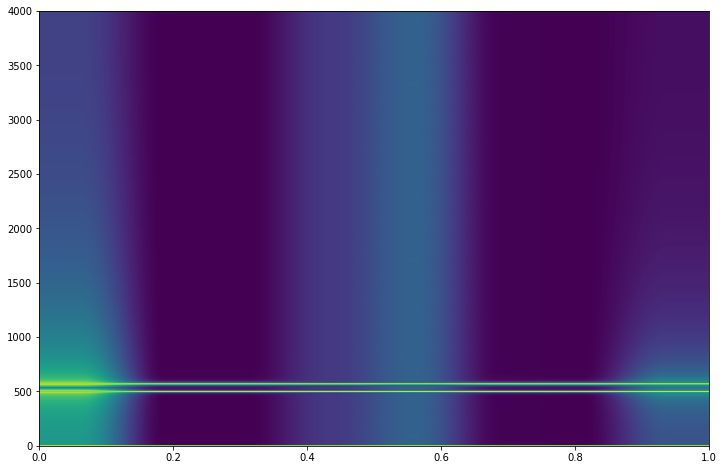

hop_size:	512	0.0640
window_size:	2048	0.2560


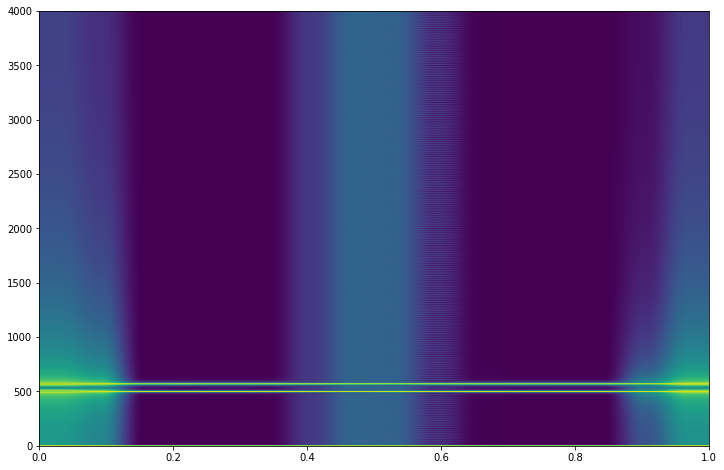

hop_size:	4096	0.5120
window_size:	4096	0.5120


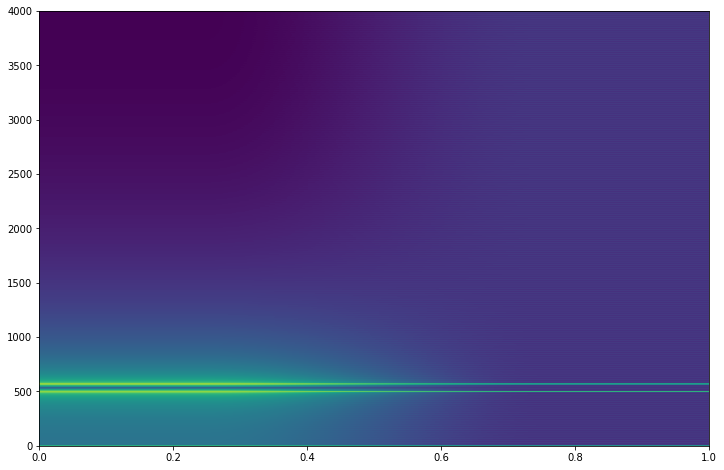

hop_size:	2048	0.2560
window_size:	4096	0.5120


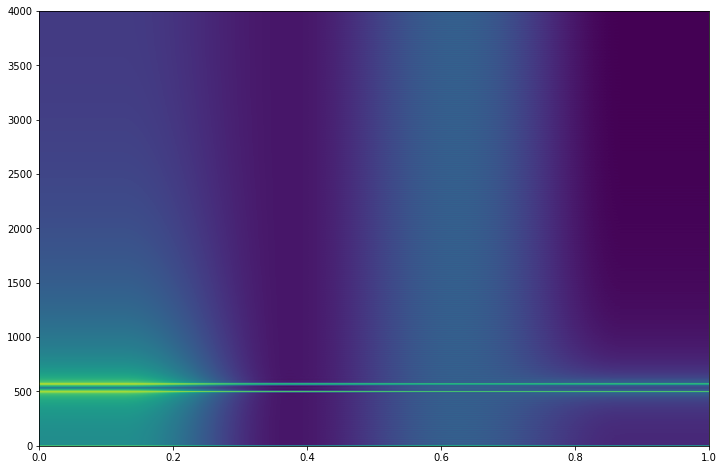

hop_size:	1024	0.1280
window_size:	4096	0.5120


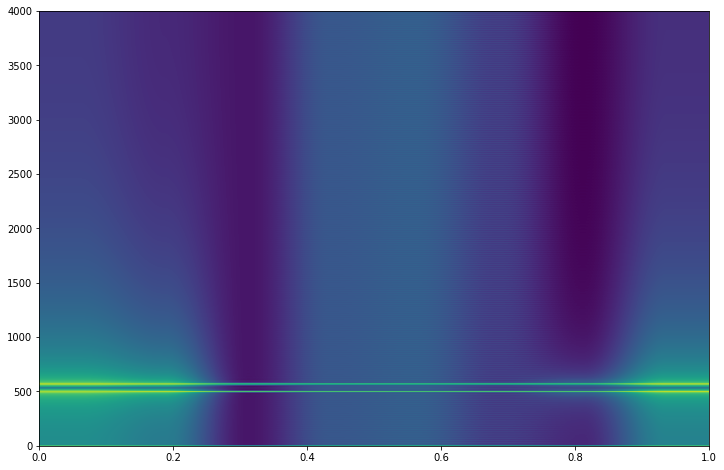

In [3]:
# können wir sowohl die frequenzen, als auch die clicks getrennt im spektrogramm darstellen?
sr = 8000
length = 1
t = np.linspace(0, length, length * sr)
x = (np.sin(t * 2 * np.pi * 500) + np.sin(t * 2 * np.pi * 570)) + 0.5
x[3800] = 1
x[4200] = 1

display(Audio(x, rate=sr))

gamma = 10
window_sizes = 2 ** np.arange(5, 13)
for window_size in window_sizes:
    hop_sizes = window_size // [1, 2, 4]
    for hop_size in hop_sizes:
        stft = lr.stft(x, n_fft=window_size, hop_length=hop_size)
        print('hop_size:\t%d\t%0.4f' % (hop_size, hop_size / sr))
        print('window_size:\t%d\t%0.4f' % (window_size, window_size / sr))
        plt.figure(figsize=(12, 8))
        plt.imshow(np.log10(1 + np.abs(stft) * gamma), aspect='auto', origin='lower', extent=[0, length, 0, sr / 2])
        plt.show()

# log_gamma compression

$x_{log-gamma} = \log_{10}\left(1 + x \cdot \gamma \right)$

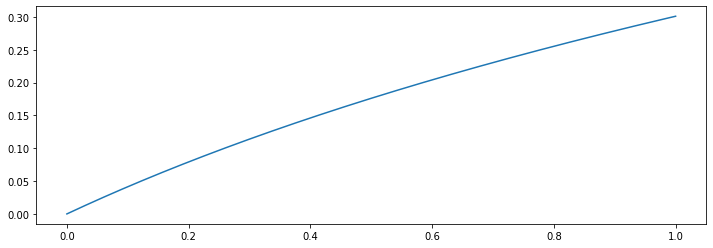

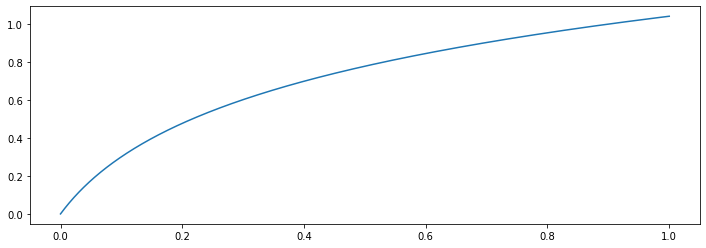

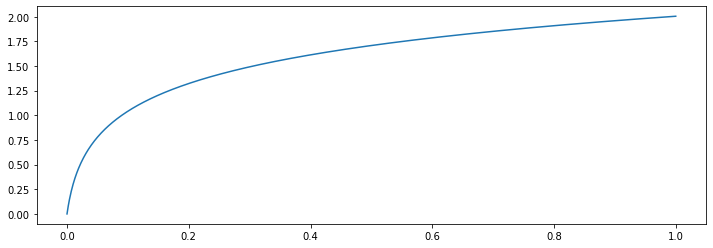

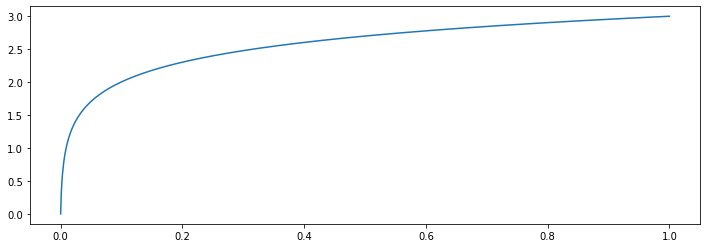

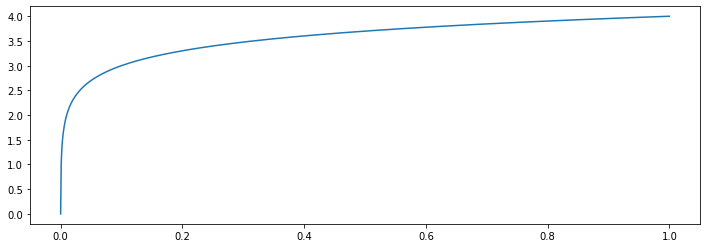

In [4]:
x = np.linspace(0, 1, 1000)

gammas = 10 ** np.arange(0, 5)
for gamma in gammas:
    plt.figure(figsize=(12, 4))
    plt.plot(x, np.log10(1 + x * gamma))
    plt.show()
# siehe log-gamma compression angewandt auf das obige click-beispiel

# Log-Freq-Spectrogram

In [5]:
# !wget https://freesound.org/data/previews/94/94812_29541-lq.mp3

In [6]:
# !mv 94812_29541-lq.mp3 ../../data/piano_scale.mp3

/Users/danielhopfner/opt/miniconda3/envs/abmp/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


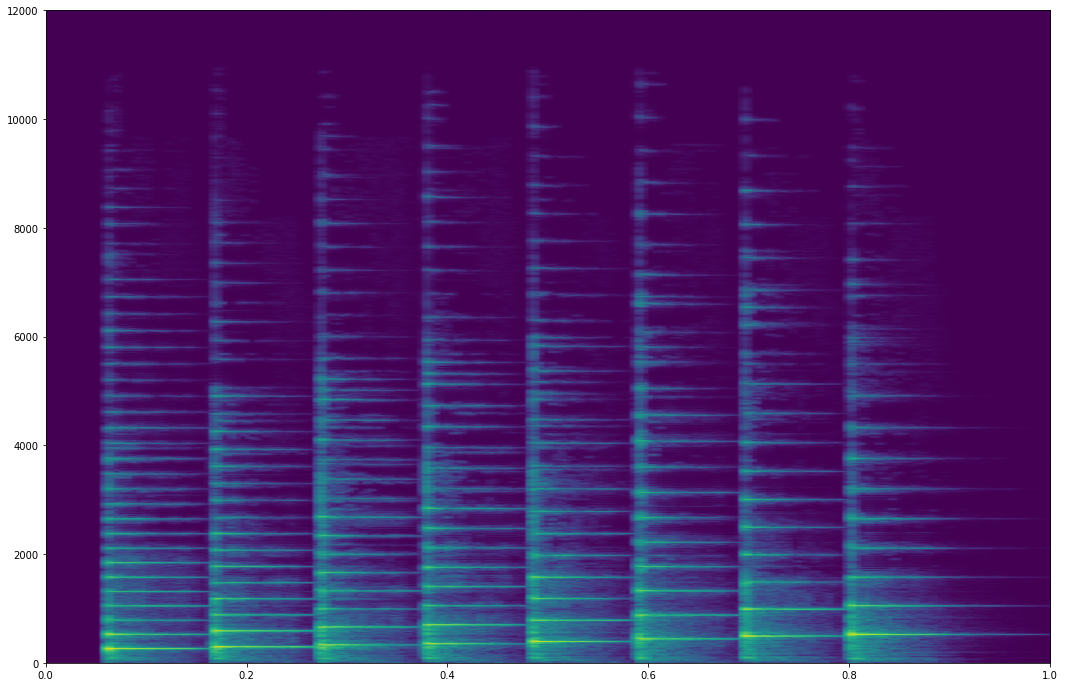

In [7]:
x, sr = lr.load('../../data/piano_scale.mp3', sr=None)

display(Audio(x, rate=sr))

stft = lr.stft(x, n_fft=4096)
gamma = 100
plt.figure(figsize=(18, 12))
# plt.subplot(2, 1, 1)
# plt.plot(np.log10(1 + np.abs(x) * gamma))
# plt.subplot(2, 1, 2)
plt.imshow(np.log10(1 + np.abs(stft) * gamma), aspect='auto', origin='lower', extent=[0, length, 0, sr / 2])
# plt.imshow(np.abs(stft), aspect='auto', origin='lower', extent=[0, length, 0, sr / 2])
plt.show()

In [8]:
# aufwärts-bewegung der einzelnen töne ist zwar sichtbar,
# aber die darstellung im spektrogramm ist aus musikologischer
# sicht nicht sehr brauchbar

In [9]:
# können wir anstatt frequenzen pitches im spektrogramm darstellen? (<-- ja!)

# dazu müssten wir die einzelnen frequenz-koeffizienten, die nahe beieinander liegen,
# zu einem pitch zusammenfassen.
# in dem fall nehmen wir immer die grenzen `p - 0.5` `p + 0.5` (also jew. ein viertelton hoch oder runter)
# und summieren alle frequenz-koeffizienten, die sich innerhalb dieser grenzen befinden, auf.

# wir sind damit nicht ganz fertig geworden, für die restliche implementierung, siehe das übungsblatt

p = 69 # beispielhaft für einige vorüberlegungen: p 69 --> 440 Hz

# wiederholung midi to frequency
def mtof(p):
    return 440 * 2 ** ((p - 69) / 12)

print('p %d:\t%0.2f Hz' % (p, mtof(p)))
print('upper:\t%0.2f Hz' % (mtof(p + 0.5)))
print('lower:\t%0.2f Hz' % (mtof(p - 0.5)))

# wiederholung: koeffizienten frequenzen ausrechnen, mit gegebenem frequenz-index `k`
def calc_f_coef(k, sr, N):
    return k * sr / N

window_size = 4096 # window-size der obigen stft
print('f_res:\t%0.2f Hz\n' % (calc_f_coef(k=1, sr=sr, N=window_size)))

# welche frequenz-koeffizienten befinden sich in der dft (oder stft) innerhalb der grenzen `p - 0.5` `p + 0.5`?
def freqs_in_dft(p, sr, N):
    freqs = []
    num_ks = N // 2
    for k in range(num_ks):
        f_coef = calc_f_coef(k=k, sr=sr, N=N)
        if (mtof(p - 0.5) < f_coef < mtof(p + 0.5)):
            freqs.append(f_coef)
    return freqs

print('freqs in p %d:\t%s' % (p, freqs_in_dft(p, sr, window_size)))
p = 60
print('freqs in p %d:\t%s' % (p, freqs_in_dft(p, sr, window_size)))
p = 48
print('freqs in p %d:\t%s' % (p, freqs_in_dft(p, sr, window_size)))

p 69:	440.00 Hz
upper:	452.89 Hz
lower:	427.47 Hz
f_res:	5.86 Hz

freqs in p 69:	[427.734375, 433.59375, 439.453125, 445.3125, 451.171875]
freqs in p 60:	[257.8125, 263.671875]
freqs in p 48:	[128.90625]
